<h1><center>Sprint 4</center></h1>
<h2><center>Tasca 2</center></h2>

### Exercici 2

_**Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.**_

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import random
import datetime as dt
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint04/data/'
data_path = Path(data_path)
plot_path = 'D:/Sistema_Solar/Python/itacademy/itacademy-datascience/sprint04/plots/'
plot_path = Path(plot_path)

Anem a obrir l'arxiu "movies.dat". Podem observar que s'importa com un string molt llarg.

In [3]:
file_name = 'movies.dat'
file = data_path / file_name
# Obrim l'arxiu
with open(file) as movies:
#    print(datFile.read())
    movies_split0 = movies.read()
print(len(movies_split0))
print(movies_split0[0:200])

171308
1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the B


Per a convertir-lo en un dataframe, farem:

1. Cada pel·lícula la separarem gràcies als salts de línia que hi ha entre ells. Obtenim una llista amb cada pel·lícula com a un ítem.
2. Cada pel·lícula té 3 camps separats per "::". Ho tornem a separar i descartarem el primer cap que és una mena d'id.
3. El segon camp conté el nom en anglès i entre parèntesis pot haver-hi fins a 2 noms (nom alternatiu en anglès i nom original), així com l'any de publicació. El tercer camp conté els gèneres, separats per "|" i voldrem tindre cada gènere en un camp diferent en el dataframe.

In [4]:
# Obrim l'arxiu i separem pels salts de línia
with open(file) as movies:
    movies_split0 = movies.read().splitlines()
    
# Separem els camps de cada pel·lícula
movies_split1 = []
for movie in movies_split0:
    movies_split1.append(movie.split('::'))

# Separem la informació del segón camp, els noms i l'any
movies_split2 = []
for movie in movies_split1:
    movie_split = []
    orig_name_year = movie[1].split('(')
    movie_split.append(orig_name_year[0])
    if len(orig_name_year) == 2:
        movie_split.append('')
        movie_split.append('')
        movie_split.append(orig_name_year[1].replace(')',''))
    elif len(orig_name_year) == 3:
        movie_split.append('')
        movie_split.append(orig_name_year[1].replace(')',''))
        movie_split.append(orig_name_year[2].replace(')',''))
    elif len(orig_name_year) == 4:
        movie_split.append(orig_name_year[1].replace(')',''))
        movie_split.append(orig_name_year[2].replace(')',''))
        movie_split.append(orig_name_year[3].replace(')',''))
    movie_genres = movie[2].split('|')
    for genre in movie_genres:
        movie_split.append(genre)
    movies_split2.append(movie_split)
    
# Convertim a dataframe
movies_df = pd.DataFrame(movies_split2, columns = ['Name_1', 'Name_2', 'Name_3', 'Release_Year', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6'])

In [5]:
movies_df

,Name_1,Name_2,Name_3,Release_Year,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6
0,Toy Story,,,1995,Animation,Children's,Comedy,None,None,None
1,Jumanji,,,1995,Adventure,Children's,Fantasy,None,None,None
2,Grumpier Old Men,,,1995,Comedy,Romance,None,None,None,None
3,Waiting to Exhale,,,1995,Comedy,Drama,None,None,None,None
4,Father of the Bride Part II,,,1995,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents,,,2000,Comedy,None,None,None,None,None
3879,Requiem for a Dream,,,2000,Drama,None,None,None,None,None
3880,Tigerland,,,2000,Drama,None,None,None,None,None
3881,Two Family House,,,2000,Drama,None,None,None,None,None


In [6]:
# Comprovem els tipus de les dades de la nostra dataframe
movies_df.dtypes

Name_1          object
Name_2          object
Name_3          object
Release_Year    object
Genre_1         object
Genre_2         object
Genre_3         object
Genre_4         object
Genre_5         object
Genre_6         object
dtype: object

In [7]:
# Ens interesa que l'any estigui en integer
movies_df['Release_Year'] = movies_df['Release_Year'] .astype(int)

In [8]:
# Guardem el dataframe de nou a csv
file_name = 'movies.csv'
file = data_path / file_name

movies_df.to_csv(file)

### Exercici 3

_**Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?**_

_**Fes una o dues representacions gràfiques i justifica la teva elecció.**_

**1. número de pel·lícules publicades per any.** 

Text(0.5, 1.0, "Frecuència en l'any de publació")

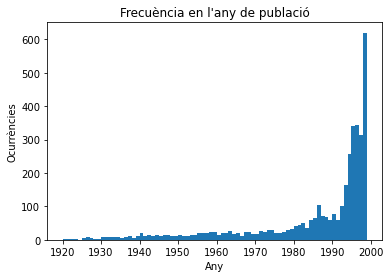

In [9]:
plt.hist(movies_df['Release_Year'], bins=np.arange(1920, 2000, 1))
plt.xlabel('Any')
plt.ylabel('Ocurrències')
plt.title('Frecuència en l\'any de publació')

El nombre de pel·lícules publicades s'ha anat incrementant de manera molt notable amb un creixement sostingut, més lentament fins a la dècada dels 70-80 on fa una pujada important i, molt especialment, en la dècada dels 90.

**2.Número de pel·lícules per génere**

Anem a contar també el número de pel·lícules per génere. Per a això, crearem un diccionari i contarem cada ocurréncia.

In [10]:
genre_count = {}
genre_columns = ['Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6']
for index, row in movies_df.iterrows():
    for genre_col in genre_columns:
        genre = row[genre_col]
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1
            
genre_count.pop(None)

16890

In [11]:
# Ordenem el diccionari segons el nombre d'ocurréncies de cada génere
genre_count = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)

In [12]:
genre_count

[('Drama', 1603),
 ('Comedy', 1200),
 ('Action', 503),
 ('Thriller', 492),
 ('Romance', 471),
 ('Horror', 343),
 ('Adventure', 283),
 ('Sci-Fi', 276),
 ("Children's", 251),
 ('Crime', 211),
 ('War', 143),
 ('Documentary', 127),
 ('Musical', 114),
 ('Mystery', 106),
 ('Animation', 105),
 ('Fantasy', 68),
 ('Western', 68),
 ('Film-Noir', 44)]

In [13]:
genres = []
counts = []
for item in genre_count:
    genres.append(item[0])
    counts.append(item[1])

Fem un gràfic d'ocurrències segons cada génere

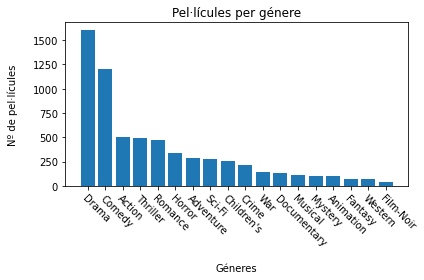

In [14]:
fig, ax = plt.subplots()
ax.bar(genres, counts)
ax.set_ylabel('Nº de pel·lícules', rotation=90, fontsize=10, labelpad=15)
ax.set_xlabel('Géneres', rotation=0, fontsize=10, labelpad=15)

# rotates labels 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 

plt.title('Pel·lícules per génere')

plt.tight_layout()
plt.show()

El gèneres més freqüent són els de Drama i Comèdia, seguits dels d'Acció, Thriller i Romanç.

**3. Gèneres més freqüents per anys**

També podem comptar la freqüència dels gèneres per anys

In [15]:
genre_count_years_df = pd.DataFrame(columns=genres)

for year in range(movies_df['Release_Year'].min(), movies_df['Release_Year'].max()):
    search = movies_df['Release_Year'] == year
    movies_df_year = movies_df[search]
    genre_count_year = {}     
    for index, row in movies_df_year.iterrows():
        for genre_col in genre_columns:
            genre = row[genre_col]
            if genre in genre_count_year:
                genre_count_year[genre] += 1
            else:
                genre_count_year[genre] = 1
    try:
        genre_count_year.pop(None)
    except KeyError:
        pass
    genre_count_year_df = pd.DataFrame(genre_count_year, index=[year])
    genre_count_years_df = genre_count_years_df.append(genre_count_year_df)

In [16]:
genre_count_years_df

,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Fantasy,Western,Film-Noir
1919,2,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,158,89,45,43,50,16,25,18,22,18,12,22,4,8,8,4,4,1
1996,150,115,37,45,48,12,22,14,20,23,8,19,7,6,7,5,1,2
1997,139,98,43,55,52,10,22,18,22,26,10,11,5,15,6,6,NaN,2
1998,166,112,44,51,58,15,16,17,18,25,5,18,3,10,8,2,1,3


In [17]:
genre_count_years_df = genre_count_years_df.replace(np.nan, 0)

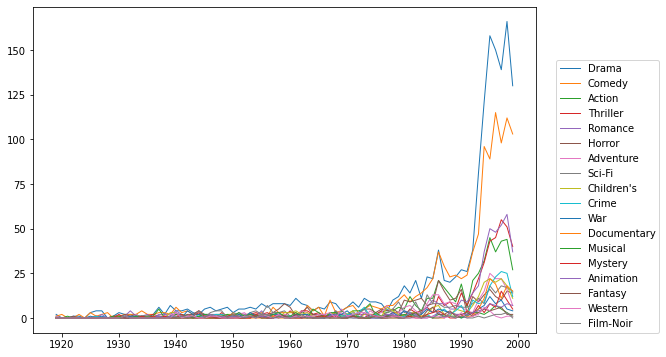

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
#colors = ['lightcoral', 'blue', 'darkred', 'mediumblue', 'goldenrod', 'mediumpurple', 'yellowgreen',
#          'slategrey', 'darkcyan', 'orchid']

for i in range(len(genres)):
    genre = genres[i]
    sub_genre_count = genre_count_years_df[genre]
    #ax.annotate(genre[i], xy=(0.6, subset_tri.values[0]), xytext=(0, 1), textcoords='offset points',
    #                                horizontalalignment='left', verticalalignment='center', size=10)
    plt.plot(sub_genre_count.index, sub_genre_count.values, ls='-', lw=1, label=genre)
    #plt.plot(sub_genre_count.index, sub_genre_count.values, color=colors[i], ls='-', lw=1, label=genres)
    
#ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
#       ylim=(10, 16), yticks= [np.arange(10, 16, 1)])

#ax.set(xlim=(0.5, 4.5), xticks=[1, 2, 3, 4],
#       ylim=(10, 16), yticks= [10, 11, 12, 13, 14, 15, 16])

#ax.set_ylabel('Preu (€/habitatge)', rotation=90, fontsize=10, labelpad=15)
#ax.set_xlabel('Trimestre', rotation=0, fontsize=10, labelpad=15)

#labels = ['GFM', 'AMJ', 'JAS', 'OND']

#ax.set_xticklabels(labels)
plt.legend(loc=(1.04, 0))
#plt.title('Evolució preu mensual dels lloguers a Barcelona per districtres, any 2021')

Representar-ho per anys dona un gràfic amb un poti-poti de línies que els primers anys no ens donen gaire informació, però podem calcular els percentatges de cada gènere en cada any i representar-ho sols els que han sigut més freqüents.

In [19]:
# Crearem un dataframe amb els percentatges anualment i per génere

genre_count_years_perc = pd.DataFrame(columns=genres)
years = genre_count_years_df.index

for i in range(len(genre_count_years_df)):
    row = genre_count_years_df.iloc[i]
    total = sum(row)
    
    row_perc = []
    for genre in genres:
        perc = (row[genre]/total)*100
        row_perc.append(perc)
    
    row_perc = pd.DataFrame([row_perc], columns=genres, index=[years[i]])
    genre_count_years_perc = genre_count_years_perc.append(row_perc)

C:\Users\Carles\AppData\Local\Temp\ipykernel_11980\1463182590.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  perc = (row[genre]/total)*100


In [20]:
genre_count_years_perc

,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Fantasy,Western,Film-Noir
1919,40.000000,20.000000,20.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1921,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1922,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1923,33.333333,66.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,28.884826,16.270567,8.226691,7.861060,9.140768,2.925046,4.570384,3.290676,4.021938,3.290676,2.193784,4.021938,0.731261,1.462523,1.462523,0.731261,0.731261,0.182815
1996,27.726433,21.256932,6.839187,8.317930,8.872458,2.218115,4.066543,2.587800,3.696858,4.251386,1.478743,3.512015,1.293900,1.109057,1.293900,0.924214,0.184843,0.369686
1997,25.740741,18.148148,7.962963,10.185185,9.629630,1.851852,4.074074,3.333333,4.074074,4.814815,1.851852,2.037037,0.925926,2.777778,1.111111,1.111111,0.000000,0.370370
1998,29.020979,19.580420,7.692308,8.916084,10.139860,2.622378,2.797203,2.972028,3.146853,4.370629,0.874126,3.146853,0.524476,1.748252,1.398601,0.349650,0.174825,0.524476


Prepararem les dades per representar sols els 5 més nobrosos, en un dataframe i incloent la resta de géneres com a altres.

In [21]:
top_genres = genres[0:5]
top_genres.append('Others')
top_genres.append('Total')

genre_count_years_top = pd.DataFrame(columns=top_genres)

for i in range(len(genre_count_years_perc)):
    perc_year = genre_count_years_perc.iloc[i]
    row = []
    others_perc = sum(perc_year[5:])
    for j in range(0, 5):
        row.append(perc_year[j])
    row.append(others_perc)
    total = sum(row)
    row.append(total)

    row = pd.DataFrame([row], columns=top_genres, index=[years[i]])
    genre_count_years_top = genre_count_years_top.append(row)

In [22]:
genre_count_years_top

,Drama,Comedy,Action,Thriller,Romance,Others,Total
1919,40.000000,20.000000,20.000000,0.000000,0.000000,20.000000,100.0
1920,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.0
1921,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.0
1922,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,100.0
1923,33.333333,66.666667,0.000000,0.000000,0.000000,0.000000,100.0
...,...,...,...,...,...,...,...
1995,28.884826,16.270567,8.226691,7.861060,9.140768,29.616088,100.0
1996,27.726433,21.256932,6.839187,8.317930,8.872458,26.987061,100.0
1997,25.740741,18.148148,7.962963,10.185185,9.629630,28.333333,100.0
1998,29.020979,19.580420,7.692308,8.916084,10.139860,24.650350,100.0


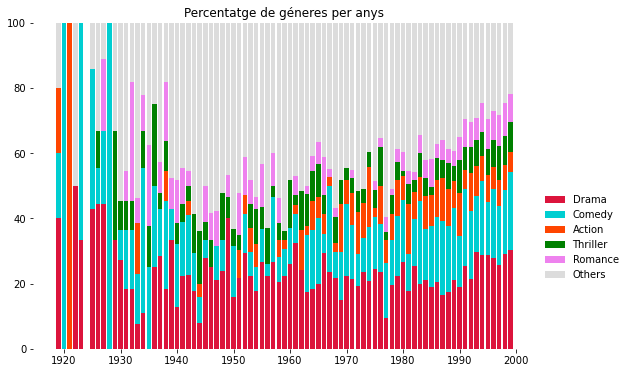

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
colors = ['crimson', 'darkturquoise', 'orangered', 'green', 'violet', 'gainsboro']

bottom_value = 0
genre_year = genre_count_years_top[top_genres[0]]
plt.bar(years, genre_year.values, color=colors[0])
bottom_value = genre_year.copy()

for i in range(1, len(top_genres)-1):
    genre_year = genre_count_years_top[top_genres[i]]
    plt.bar(years, genre_year.values, bottom=bottom_value.values, color=colors[i])
    bottom_value += genre_year

plt.title('Percentatge de géneres per anys')

plt.legend(top_genres, bbox_to_anchor=([1, 0.5, 0, 0]), ncol=1, frameon=False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Inicialment, amb poques pel·lícules publicades, aquestes se classificaven en pocs gèneres diferents, però amb el temps, aquests han anat augmentant. Dels 5 gèneres més freqüents per a tot el període, aquests estan menys representats en les dècades dels 40 al 60, però aquesta tendència s'inverteix durant les dècades dels 70 i 80 i especialment als 90, quan la comèdia comença a aparèixer com a gènere en més pel·lícules.